# Overfitting Example

In [5]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import torch.optim.lr_scheduler as lr_scheduler

In [7]:
# Using GPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


## Plotting a curve with outliers

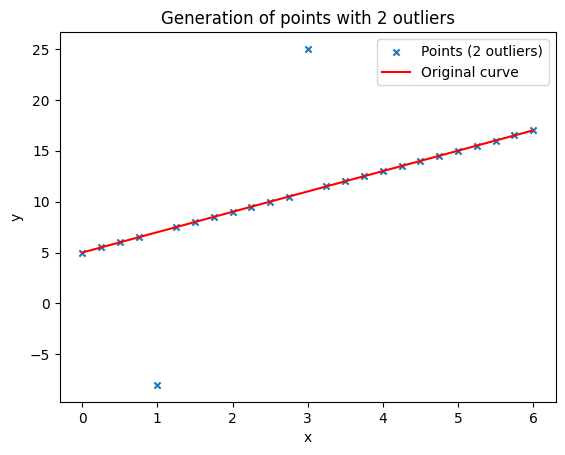

In [3]:
# Parameters for the curve y = mx + b
m = 2
b = 5

# Generating points
np.random.seed(42)
x = np.linspace(0, 6, 25)
y_true = m * x + b


y_noisy = y_true.copy()

# Adding 2 outliers
outliers_indices = [4, 12]  
y_noisy[outliers_indices] = [-8, 25]

# Plot
plt.scatter(x, y_noisy, label="Points (2 outliers)", marker="x", s=20)
plt.plot(x, y_true, label="Original curve", color = 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Generation of points with 2 outliers")
plt.show()

## Definition of a Neural Network

In [ ]:
# Define the NN model

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 50)
        self.hidden_2 = nn.Linear(50, 50)
        self.output = nn.Linear(50, 1)
        
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.relu(self.hidden_2(x))
        x = torch.relu(self.hidden_2(x))
        x = torch.relu(self.hidden_2(x))
        x = self.output(x)
        return x


In [9]:
# Conversion of the data to tensors
x_train_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1).to(device)
y_train_tensor = torch.tensor(y_noisy, dtype=torch.float32).view(-1, 1).to(device)

In [24]:
# Initialiszation of the model
model = SimpleNN().to(device)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

## Training

In [25]:
num_epochs = 1000

# Function to handle the learning rate
def lr_lambda(epoch):
    total_epochs = num_epochs
    if epoch < total_epochs // 6:
        return 0.1  # 0.1 * 1.0 = 0.1
    elif epoch < 2*total_epochs // 6:
        return 0.05  # 0.1 * 0.5 = 0.05
    elif epoch < 3 * total_epochs // 6:
        return 0.03  # 0.1 * 0.1 = 0.01
    elif epoch < 4 * total_epochs // 6:
        return 0.01  # 0.1 * 0.1 = 0.01
    elif epoch < 5 * total_epochs // 6:
        return 0.005  # 0.1 * 0.1 = 0.01
    else:
        return 0.001  # 0.1 * 0.05 = 0.005

# Initialisze the scheduler
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda)

In [26]:
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0 or epoch==0:
        lr = optimizer.param_groups[0]["lr"]
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, LR: {lr:.6f}')


Epoch [1/1000], Loss: 151.5173, LR: 0.010000
Epoch [100/1000], Loss: 14.4949, LR: 0.010000
Epoch [200/1000], Loss: 7.5998, LR: 0.010000
Epoch [300/1000], Loss: 3.7961, LR: 0.010000
Epoch [400/1000], Loss: 0.3456, LR: 0.010000
Epoch [500/1000], Loss: 0.0005, LR: 0.010000
Epoch [600/1000], Loss: 0.9698, LR: 0.010000
Epoch [700/1000], Loss: 0.0008, LR: 0.010000
Epoch [800/1000], Loss: 0.0003, LR: 0.010000
Epoch [900/1000], Loss: 0.0002, LR: 0.010000
Epoch [1000/1000], Loss: 0.0001, LR: 0.010000


## Evaluate the model

In [28]:
model.eval()

SimpleNN(
  (hidden): Linear(in_features=1, out_features=50, bias=True)
  (hidden_2): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
)

In [31]:
# Generate data and make prediction
x_ = np.linspace(0, 6, 100)
x_test = torch.tensor(x_, dtype=torch.float32).view(-1, 1).to(device)
with torch.no_grad():
    y_pred_tensor = model(x_test)

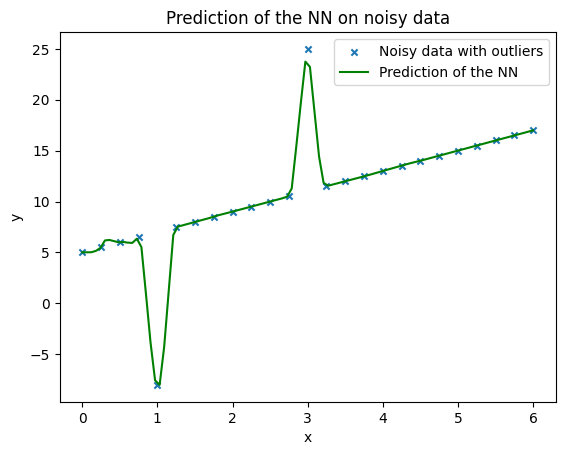

In [32]:
# Plot
x_test = x_test.cpu()
y_pred_tensor = y_pred_tensor.cpu()

plt.scatter(x, y_noisy, label="Noisy data with outliers", marker="x", s=20)
plt.plot(x_test.numpy(), y_pred_tensor.numpy(), label="Prediction of the NN", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Prediction of the NN on noisy data")
plt.show()

## Compare with polynomial curve fitting

In [33]:
# Polynomial curve fitting of degree 13
degree = 13
coeffs = np.polyfit(x, y_noisy, deg=degree) 
p = np.poly1d(coeffs)

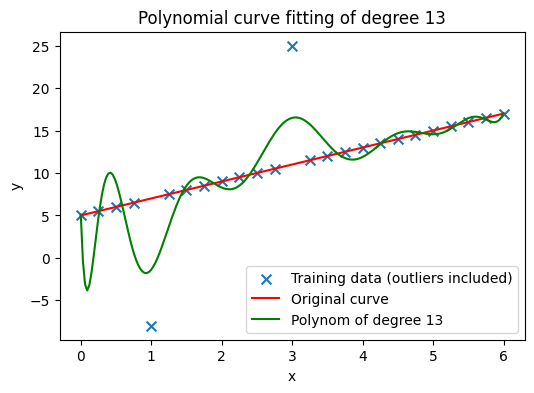

In [35]:
# Evaluate the polynom
x_fit = np.linspace(0, 6, 200)
y_fit = p(x_fit)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y_noisy, label="Training data (outliers included)", marker="x", s=50)
plt.plot(x, y_true, label="Original curve", color='red')
plt.plot(x_fit, y_fit, label=f"Polynom of degree {degree}", color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Polynomial curve fitting of degree {degree}")
plt.show()